### Import Package

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import MySQLdb

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

### Connect DB

In [2]:
db = MySQLdb.connect(
    "db.fastcamp.us",
    "root",
    "dkstncks",
    "football",
    charset='utf8',
)

### Make Query

In [3]:
def make_query(position):
    """
    
    parameter------------
    position : M, D, F, G
    
    return---------------
    SQL_QUERY String
    
    """
    SQL_QUERY = """
        SELECT 
            age, tall, weight, apps_start, apps_sub, mins, goals, assists, yel, red
            , spg, ps_x, motm, aw, tackles, inter, fouls, offsides, clear, drb, blocks
            , owng, keyp_x, fouled, off, disp, unstch, avgp, ps_y, rating
        FROM player
        WHERE position like "%{position}%"
        ;
    """.format(position=position)
    
    return SQL_QUERY

### Get player data each position

In [4]:
# make each position player datas

# forword
SQL_QUERY = make_query("F")
forword_df = pd.read_sql(SQL_QUERY, db)

# midfilder
SQL_QUERY = make_query("M")
midfilder_df = pd.read_sql(SQL_QUERY, db)

# defencer
SQL_QUERY = make_query("D")
defencer_df = pd.read_sql(SQL_QUERY, db)

# goalkeeper
SQL_QUERY = make_query("G")
goalkeeper_df = pd.read_sql(SQL_QUERY, db)

# the number of each postion player
len(forword_df), len(midfilder_df), len(defencer_df), len(goalkeeper_df)

(1106, 1969, 1480, 289)

### Scaling

In [5]:
X = forword_df.ix[:,:-1]
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

In [6]:
dfX0 = pd.DataFrame(X_scaled, columns=X.columns)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(forword_df.ix[:,-1], columns=["rating"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

const       age      tall   weight  apps_start  apps_sub      mins  \
1101      1  4.652384  4.572042  3.90497    0.194712  0.446523  0.162054   
1102      1  6.867805  4.597302  3.70725    0.292068  1.339568  0.362371   
1103      1  3.766216  0.000000  0.00000    0.000000  0.223261  0.007878   
1104      1  5.317011  4.344703  3.31181    0.097356  1.786090  0.240830   
1105      1  6.203179  4.647822  3.31181    0.194712  0.893045  0.231827   

         goals  assists       yel   ...      blocks  owng    keyp_x    fouled  \
1101  0.000000      0.0  0.000000   ...    2.324998   0.0  0.920807  0.686014   
1102  0.193644      0.0  0.000000   ...    0.465000   0.0  0.736646  1.097623   
1103  0.000000      0.0  0.000000   ...    0.000000   0.0  1.841614  0.000000   
1104  0.000000      0.0  0.500306   ...    0.000000   0.0  0.552484  0.823217   
1105  0.000000      0.0  0.000000   ...    0.929999   0.0  0.368323  0.411609   

           off      disp    unstch      avgp      ps_y  rating  
1101  0.000000  0.000000  0.356838  1.449486  4.776819    6.43  
1102  3.335241  0.136715  0.713675  0.642177  4.116320    6.23  
1103  0.000000  0.000000  1.189459  0.550438  4.912457    6.16  
1104  0.277937  1.230434  0.356838  1.018310  5.130657    6.11  
1105  0.555874  0.273430  0.237892  0.807309  4.004272    6.09  

[5 rows x 31 columns]

### Summary OLS

In [7]:
model = sm.OLS(df.ix[:, -1], df.ix[:, :-1])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     263.4
Date:                Sat, 25 Jun 2016   Prob (F-statistic):               0.00
Time:                        18:08:23   Log-Likelihood:                 523.52
No. Observations:                1106   AIC:                            -989.0
Df Residuals:                    1077   BIC:                            -843.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.0044      0.039    155.680      0.0

### Remove Some Feature

In [8]:
# remove feature
remove_column_list = ["age", "tall", "weight", "apps_start", "red", "ps_x", "fouls", "offsides", "owng", "off", "disp","ps_y"]
reature_removed_df = df.drop(remove_column_list, axis=1) 

In [9]:
model = sm.OLS(reature_removed_df.ix[:, -1], reature_removed_df.ix[:, :-1])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     414.6
Date:                Sat, 25 Jun 2016   Prob (F-statistic):               0.00
Time:                        18:08:27   Log-Likelihood:                 496.89
No. Observations:                1106   AIC:                            -957.8
Df Residuals:                    1088   BIC:                            -867.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.9570      0.012    501.135      0.0

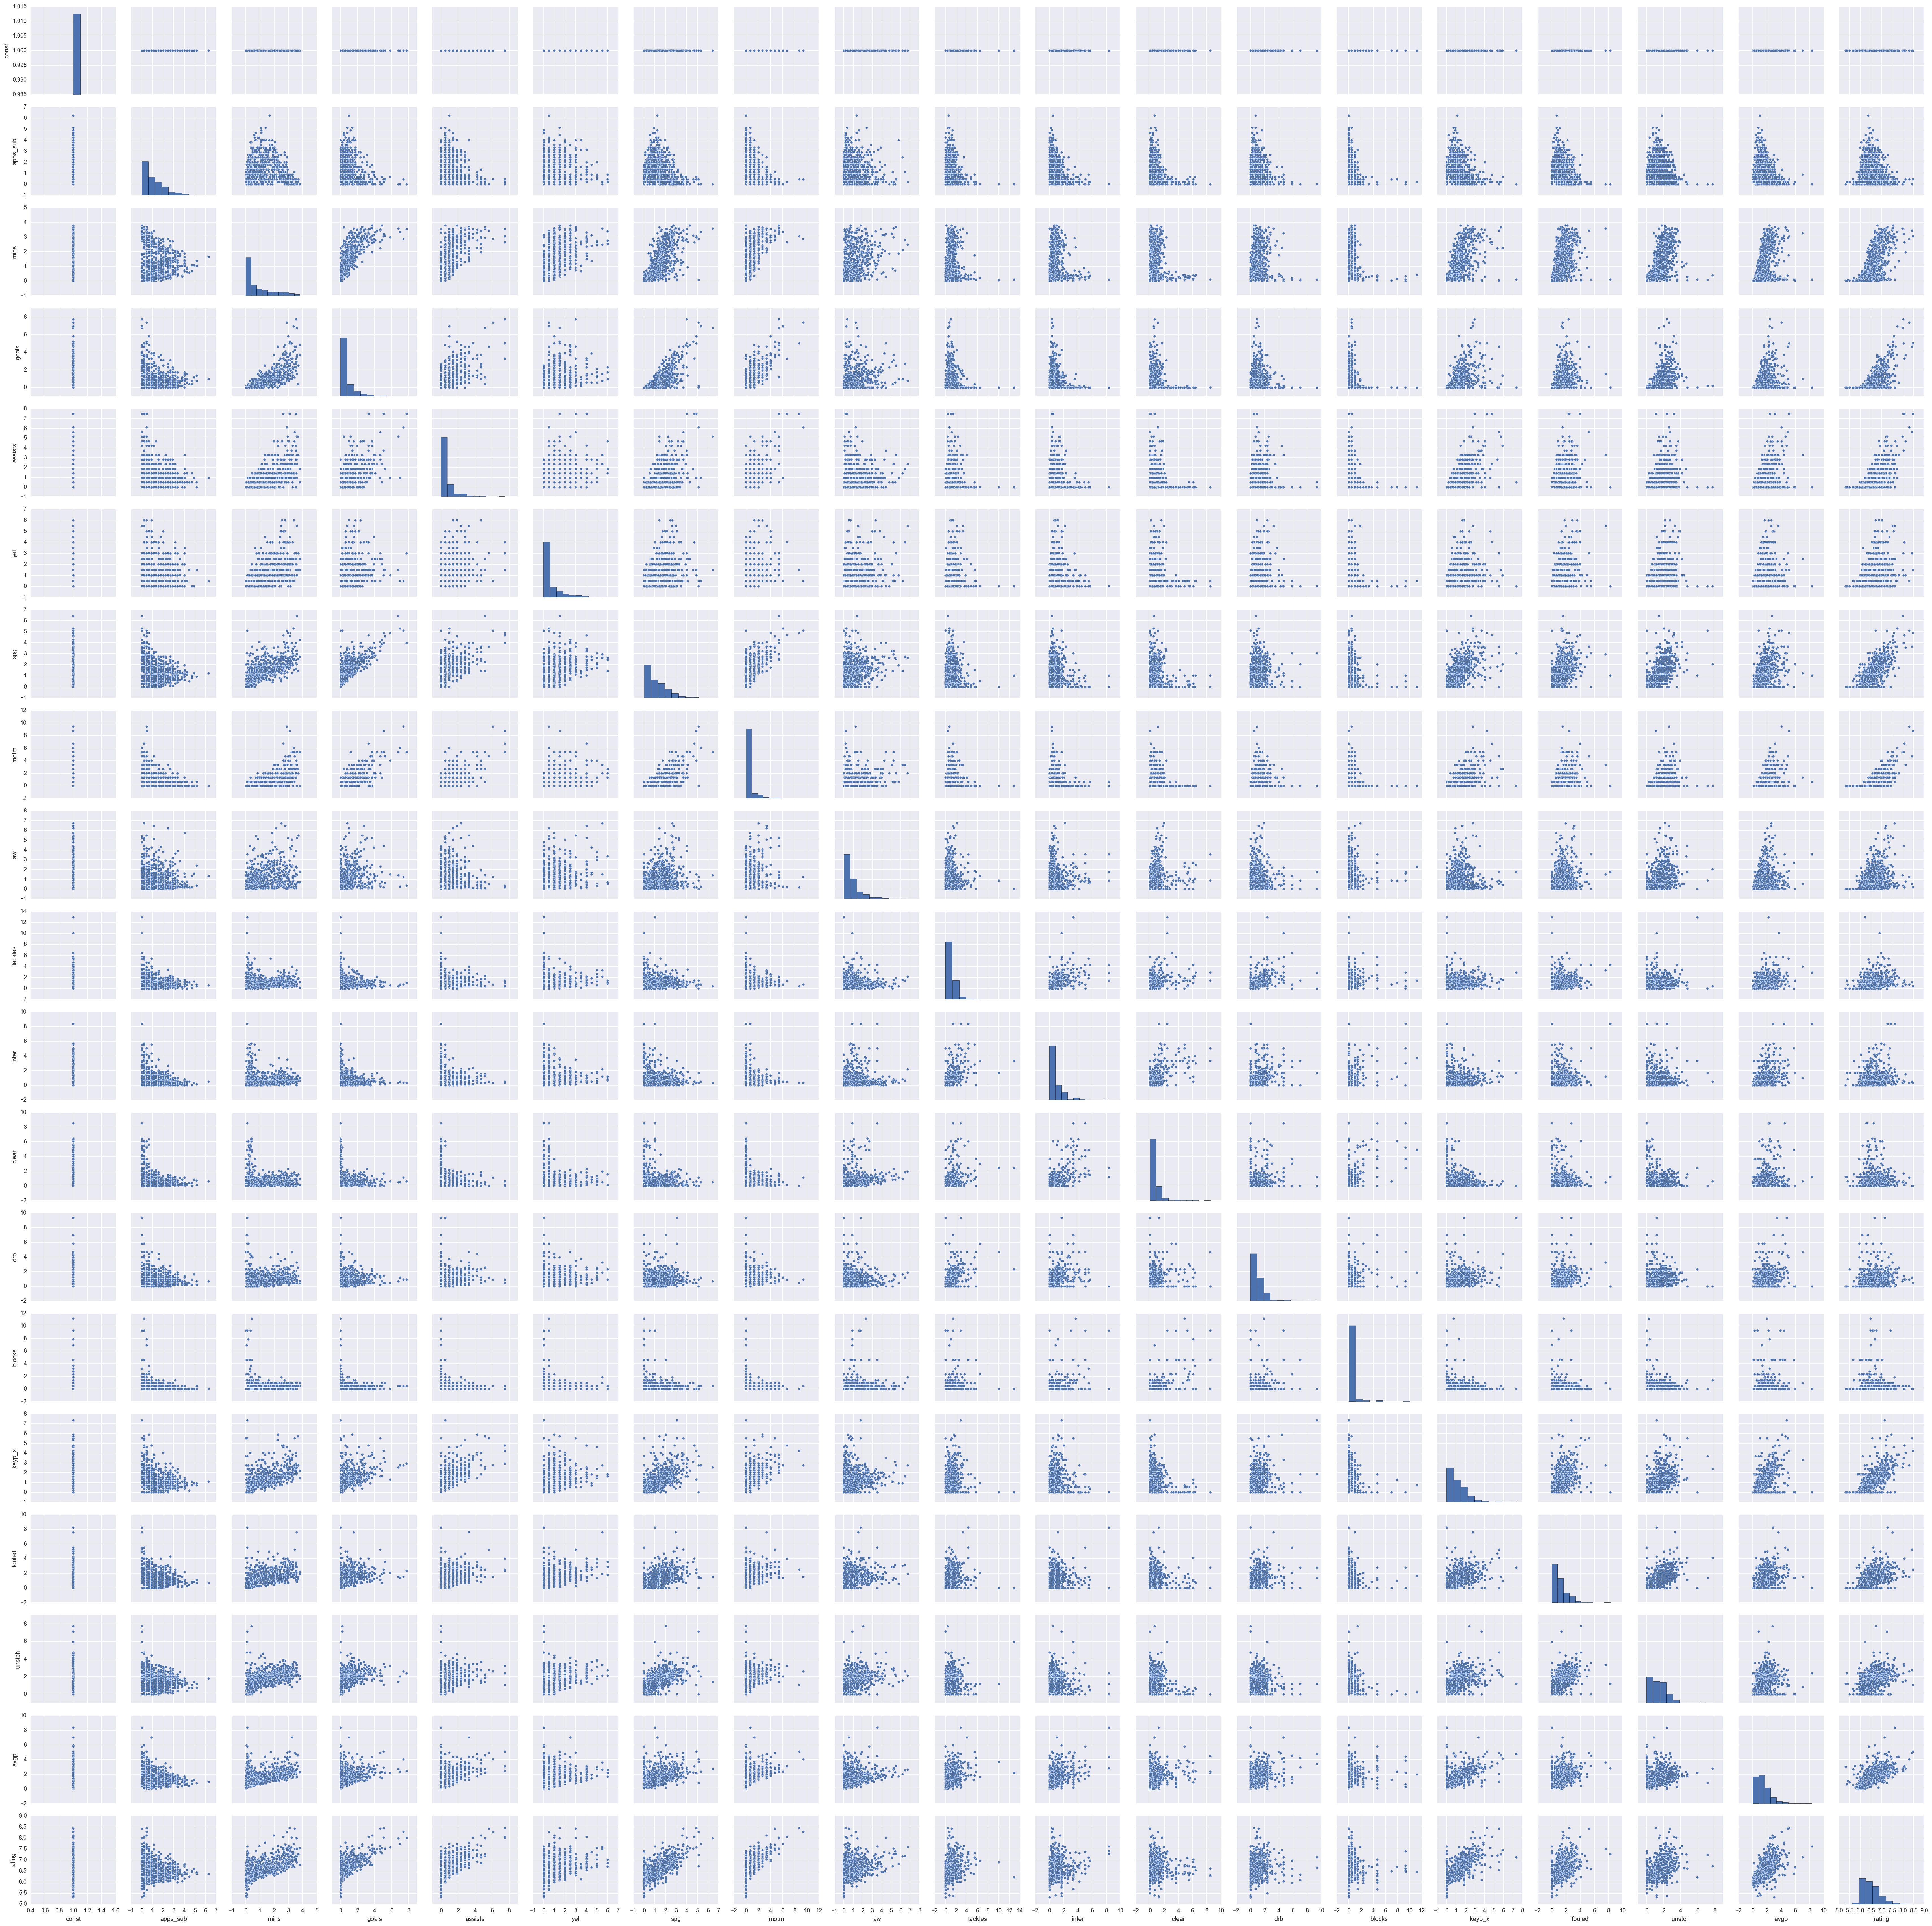

In [10]:
sns.pairplot(reature_removed_df)

In [ ]:
sns.jointplot("LSTAT","rating", data=df2)